In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("venky73/spam-mails-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.86M/1.86M [00:00<00:00, 2.50MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/venky73/spam-mails-dataset/versions/1


In [ ]:
import os
print(os.listdir(path))

['spam_ham_dataset.csv']


In [ ]:
import pandas as pd

# Read CSV file
file_path = os.path.join(path, "spam_ham_dataset.csv")
df = pd.read_csv(file_path)

print("Data preview:")
print(df.head())

Data preview:
   Unnamed: 0 label  \
0         605   ham   
1        2349   ham   
2        3624   ham   
3        4685  spam   
4        2030   ham   

                                                                                                  text  \
0  Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on mond...   
1  Subject: hpl nom for january 9 , 2001\r\n( see attached file : hplnol 09 . xls )\r\n- hplnol 09 ...   
2  Subject: neon retreat\r\nho ho ho , we ' re around to that most wonderful time of the year - - -...   
3  Subject: photoshop , windows , office . cheap . main trending\r\nabasements darer prudently fort...   
4  Subject: re : indian springs\r\nthis deal is to book the teco pvr revenue . it is my understandi...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  


In [ ]:

import os
import pandas as pd
import numpy as np
from IPython.display import display

# Set display options to show more rows and wider columns
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_colwidth", 100)

# Define the file path and load the data
file_path = os.path.join(path, "spam_ham_dataset.csv")
emails = pd.read_csv(file_path)

# Print dataset dimensions and preview the first few rows
print("Successfully loaded {} rows and {} columns!".format(emails.shape[0], emails.shape[1]))
display(emails.head())  # Directly using

Successfully loaded 5171 rows and 4 columns!


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on mond...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see attached file : hplnol 09 . xls )\r\n- hplnol 09 ...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re around to that most wonderful time of the year - - -...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap . main trending\r\nabasements darer prudently fort...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is to book the teco pvr revenue . it is my understandi...,0


In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

spam_keywords = ['free', 'win', 'winner', 'claim', 'click', 'offer', 'money', 'buy now', 'urgent', 'limited']
# Redefine the function to tokenize and then check for spam keywords
def label_email(content):
    tokens = word_tokenize(content.lower())  # Tokenize the content into words
    if any(keyword in tokens for keyword in spam_keywords):
        return 1  # Spam
    else:
        return 0  # Ham
emails['label'] = emails['text'].apply(label_email)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


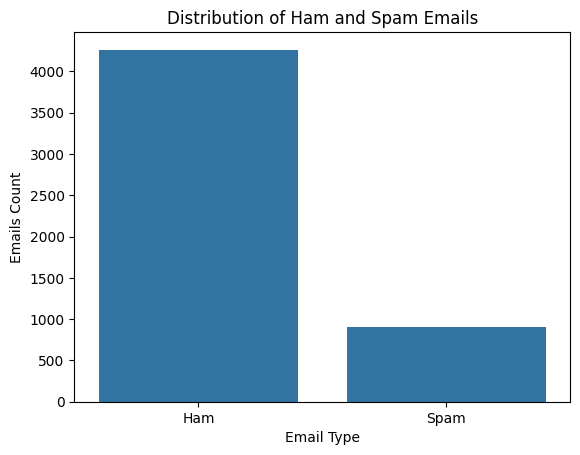

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution
sns.countplot(x='label', data=emails)
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.title("Distribution of Ham and Spam Emails")
plt.xlabel("Email Type")
plt.ylabel("Emails Count")
plt.show()

In [ ]:
# Calculate frequency and percentage for Ham
ham_count = emails['label'].value_counts()[0]
ham_percentage = emails['label'].value_counts(normalize=True)[0] * 100
print(f"Ham Emails - Frequency: {ham_count}, Percentage: {ham_percentage:.2f}%")

# Calculate frequency and percentage for Spam
spam_count = emails['label'].value_counts()[1]
spam_percentage = emails['label'].value_counts(normalize=True)[1] * 100
print(f"Spam Emails - Frequency: {spam_count}, Percentage: {spam_percentage:.2f}%")

Ham Emails - Frequency: 4263, Percentage: 82.44%
Spam Emails - Frequency: 908, Percentage: 17.56%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from nltk.tokenize import word_tokenize
import nltk

In [ ]:
# Preprocess text and tokenize
def preprocess_text(content):
    tokens = word_tokenize(content.lower())  # Tokenize the content into words
    return ' '.join(tokens)  # Rejoin tokens into a single string

# Apply text preprocessing
emails['processed_text'] = emails['text'].apply(preprocess_text)

# Separate features (X) and target (y)
X = emails['processed_text']
y = emails['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use TF-IDF Vectorizer to convert text to numerical features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression Model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_tfidf, y_train)

# Support Vector Machine (SVM) Model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test_tfidf)
svm_predictions = svm_model.predict(X_test_tfidf)

# Evaluate and print classification reports
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))

print("\nSupport Vector Machine Classification Report:")
print(classification_report(y_test, svm_predictions))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1293
           1       0.93      0.54      0.68       259

    accuracy                           0.92      1552
   macro avg       0.92      0.77      0.82      1552
weighted avg       0.92      0.92      0.91      1552


Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1293
           1       0.94      0.65      0.77       259

    accuracy                           0.93      1552
   macro avg       0.94      0.82      0.86      1552
weighted avg       0.93      0.93      0.93      1552

